<a href="https://colab.research.google.com/github/GawaliNeha/Lp3/blob/main/Uber_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [67]:
df=pd.read_csv("uber.csv")

#Pre-processing

In [68]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1.0
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1.0
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1.0
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3.0
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5.0


In [69]:
df.shape


(17848, 9)

In [70]:
df.info


<bound method DataFrame.info of        Unnamed: 0                            key  fare_amount  \
0        24238194    2015-05-07 19:52:06.0000003          7.5   
1        27835199    2009-07-17 20:04:56.0000002          7.7   
2        44984355   2009-08-24 21:45:00.00000061         12.9   
3        25894730    2009-06-26 08:22:21.0000001          5.3   
4        17610152  2014-08-28 17:47:00.000000188         16.0   
...           ...                            ...          ...   
17843    52767148  2012-04-14 02:47:00.000000111         18.1   
17844    32667836  2009-02-19 07:25:00.000000153         26.5   
17845    37364579    2012-05-04 03:54:12.0000001          4.9   
17846    16137370    2014-05-14 16:35:21.0000003         11.0   
17847    42510306       2009-05-06 08:31:56.0000          NaN   

               pickup_datetime  pickup_longitude  pickup_latitude  \
0      2015-05-07 19:52:06 UTC        -73.999817        40.738354   
1      2009-07-17 20:04:56 UTC        -73.994355 

In [71]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          1
pickup_datetime      1
pickup_longitude     1
pickup_latitude      1
dropoff_longitude    1
dropoff_latitude     1
passenger_count      1
dtype: int64

In [72]:
df.dropna(axis=0,inplace=True)

In [73]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [74]:
df.info

<bound method DataFrame.info of        Unnamed: 0                            key  fare_amount  \
0        24238194    2015-05-07 19:52:06.0000003          7.5   
1        27835199    2009-07-17 20:04:56.0000002          7.7   
2        44984355   2009-08-24 21:45:00.00000061         12.9   
3        25894730    2009-06-26 08:22:21.0000001          5.3   
4        17610152  2014-08-28 17:47:00.000000188         16.0   
...           ...                            ...          ...   
17842    33399654  2009-09-24 23:49:00.000000167         12.1   
17843    52767148  2012-04-14 02:47:00.000000111         18.1   
17844    32667836  2009-02-19 07:25:00.000000153         26.5   
17845    37364579    2012-05-04 03:54:12.0000001          4.9   
17846    16137370    2014-05-14 16:35:21.0000003         11.0   

               pickup_datetime  pickup_longitude  pickup_latitude  \
0      2015-05-07 19:52:06 UTC        -73.999817        40.738354   
1      2009-07-17 20:04:56 UTC        -73.994355 

#Distance

In [75]:
def haversine(lon_1,lon_2,lat_1,lat_2):

  lon_1,lon_2,lat_1,lat_2 = np.radians(lon_1), np.radians(lon_2), np.radians(lat_1), np.radians(lat_2)


  diff_lon = lon_2-lon_1
  diff_lat = lat_2-lat_1

  km = 2 * 6371 * np.arcsin(np.sqrt(np.sin(diff_lat/2.0)**2 +
                                np.cos(lat_1)*np.cos(lat_2)*np.sin(diff_lon/2.0)**2))

  return km

In [76]:
df['Distance']= haversine(df['pickup_longitude'],df['dropoff_longitude'],df['pickup_latitude'],df['dropoff_latitude'])

In [77]:
df['Distance']=df['Distance'].astype(float).round(2)
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1.0,1.68
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1.0,2.46
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1.0,5.04
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3.0,1.66
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5.0,4.48


Text(0, 0.5, 'fare_amount')

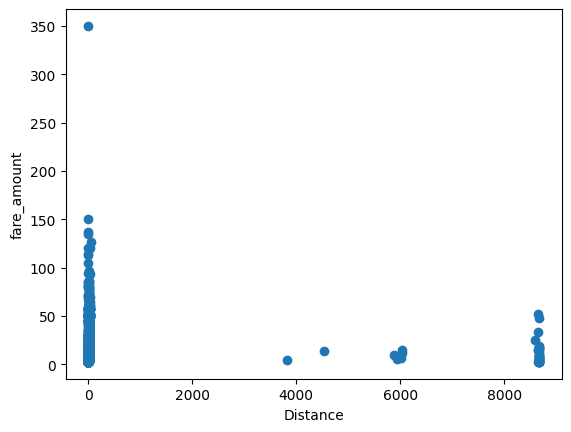

In [78]:
plt.scatter(df['Distance'],df['fare_amount'])
plt.xlabel("Distance")
plt.ylabel("fare_amount")

#Outliner

In [79]:
df.drop(df[df['Distance']>60].index, inplace = True)
df.drop(df[df['Distance']==0].index, inplace = True)
df.drop(df[df['fare_amount']==0].index, inplace = True)
df.drop(df[df['fare_amount']<0].index, inplace = True)
df.shape

(17297, 10)

In [80]:
df.drop(df[(df['fare_amount']>100) & (df['Distance']<1)].index, inplace = True)
df.drop(df[(df['fare_amount']<100) & (df['Distance']>100)].index, inplace = True)
df.shape

(17294, 10)

Text(0, 0.5, 'fare_amount')

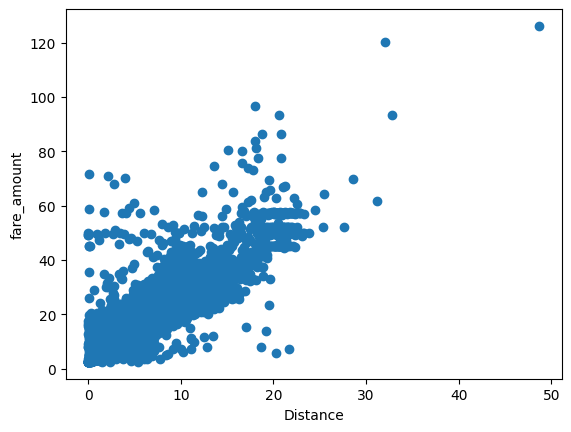

In [81]:
plt.scatter(df['Distance'],df['fare_amount'])
plt.xlabel('Distance')
plt.ylabel('fare_amount')

#New DataFrame

In [82]:
df2 = pd.DataFrame().assign(fare=df['fare_amount'], Distance=df['Distance'])
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17294 entries, 0 to 17846
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   fare      17294 non-null  float64
 1   Distance  17294 non-null  float64
dtypes: float64(2)
memory usage: 405.3 KB


In [83]:
df2.shape

(17294, 2)

#Plot Target Fare Distribution

<ipython-input-84-55458159fbeb>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2['fare'], color='g', hist_kws=dict(edgecolor="black", linewidth=2), bins=30)


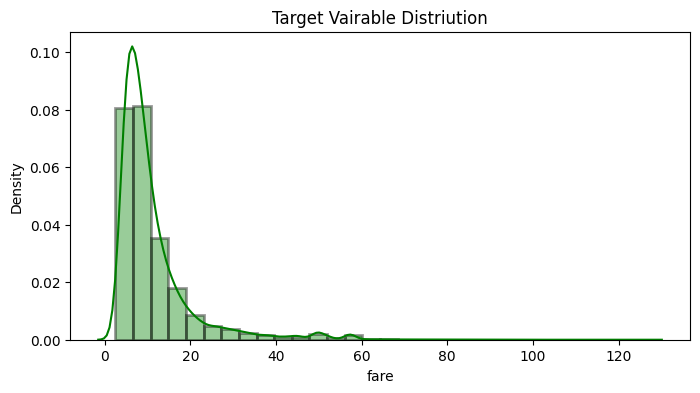

In [84]:
plt.figure(figsize=[8,4])
sns.distplot(df2['fare'], color='g', hist_kws=dict(edgecolor="black", linewidth=2), bins=30)
plt.title('Target Vairable Distriution')
plt.show()

#Two variables

In [85]:
x=df2['fare']
y=df2['Distance']

In [86]:
#independent var
X = df2['Distance'].values.reshape(-1,1)

#dependent var
Y = df2['fare'].values.reshape(-1,1)

#Standardscalar

In [87]:
#Scale

from sklearn.preprocessing import StandardScaler
std = StandardScaler()
y_std = std.fit_transform(Y)
x_std = std.fit_transform(X)

#Linear Regression

In [88]:
#test-train

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_std,y_std,test_size=0.2, random_state=0)


In [89]:
from sklearn.linear_model import LinearRegression
l_reg = LinearRegression()
l_reg.fit(x_train,y_train)

LinearRegression()

In [90]:
y_pred = l_reg.predict(x_test)

In [91]:
#predict test values

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))


Mean Absolute Error: 0.2472299376031287
Mean Squared Error: 0.2078197109703011
Root Mean Squared Error: 0.4558724722664235


#Linear Regression Plot

Text(0, 0.5, 'fare_amount')

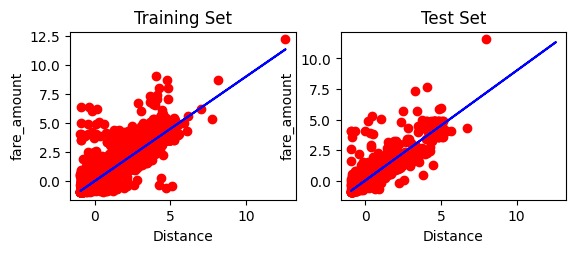

In [92]:
plt.subplot(2,2,1)
plt.scatter(x_train,y_train,color = 'red')
plt.plot(x_train, l_reg.predict(x_train),color = 'blue')
plt.title("Training Set")
plt.xlabel("Distance")
plt.ylabel("fare_amount")

plt.subplot(2,2,2)
plt.scatter(x_test,y_test,color = 'red')
plt.plot(x_train, l_reg.predict(x_train),color = 'blue')
plt.title("Test Set")
plt.xlabel("Distance")
plt.ylabel("fare_amount")

#Random Forest

In [93]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100)
rf.fit(x_train, y_train)

<ipython-input-93-5bb8bda07f2c>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train, y_train)


RandomForestRegressor()

In [94]:
y_pred = rf.predict(x_test)

In [95]:
y_pred

array([-0.45477467, -0.58749558, -0.27068043, ..., -0.25379167,
        0.04593453, -0.35603453])

In [96]:
#Errors

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))


Mean Absolute Error: 0.26734599535891873
Mean Squared Error: 0.250291443789581
Root Mean Squared Error: 0.5002913588995727


#Random Forest Plot


Text(0, 0.5, 'fare_amount')

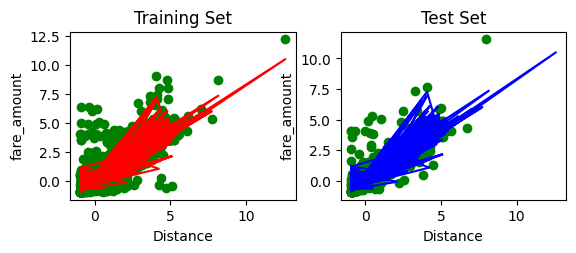

In [97]:
plt.subplot(2,2,1)
plt.scatter(x_train,y_train,color = 'green')
plt.plot(x_train, rf.predict(x_train),color = 'red')
plt.title("Training Set")
plt.xlabel("Distance")
plt.ylabel("fare_amount")

plt.subplot(2,2,2)
plt.scatter(x_test,y_test,color = 'green')
plt.plot(x_train, rf.predict(x_train),color = 'blue')
plt.title("Test Set")
plt.xlabel("Distance")
plt.ylabel("fare_amount")